In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Summary
This notebook contains my initial data exploration. 

This includes basic visualizations of the main rating dataset, as well as joining this information to other IMDb datasets that may prove useful. These datasets include information on various titles for each movie (probably not useful), basic information on each movie (useful), and ratings for each movie (useful). 

The final output of this notebook is a smaller, cleaned and augmented csv file to be used for the actual prediction.

# Data

We have a dataset of users, movie titles, ratings, and review dates. Each entry comes from a different review that the user posted. Note that there's a lot of selection there - some people are much more likely to post reviews than others.

In [3]:
raw_data = np.load("Dataset.npy")

In [4]:
raw_data

array(['ur4592644,tt0120884,10,16 January 2005',
       'ur3174947,tt0118688,3,16 January 2005',
       'ur3780035,tt0387887,8,16 January 2005', ...,
       'ur4592639,tt0107423,9,16 January 2005',
       'ur4581944,tt0102614,8,16 January 2005',
       'ur1162550,tt0325596,7,16 January 2005'], dtype='<U43')

In [5]:
df = pd.DataFrame(raw_data)

In [6]:
df

,0
0,"ur4592644,tt0120884,10,16 January 2005"
1,"ur3174947,tt0118688,3,16 January 2005"
2,"ur3780035,tt0387887,8,16 January 2005"
3,"ur4592628,tt0346491,1,16 January 2005"
4,"ur3174947,tt0094721,8,16 January 2005"
...,...
4669815,"ur0581842,tt0107977,6,16 January 2005"
4669816,"ur3174947,tt0103776,8,16 January 2005"
4669817,"ur4592639,tt0107423,9,16 January 2005"
4669818,"ur4581944,tt0102614,8,16 January 2005"


In [7]:
split_df = df[0].str.split(',')

In [8]:
split_df

0          [ur4592644, tt0120884, 10, 16 January 2005]
1           [ur3174947, tt0118688, 3, 16 January 2005]
2           [ur3780035, tt0387887, 8, 16 January 2005]
3           [ur4592628, tt0346491, 1, 16 January 2005]
4           [ur3174947, tt0094721, 8, 16 January 2005]
                              ...                     
4669815     [ur0581842, tt0107977, 6, 16 January 2005]
4669816     [ur3174947, tt0103776, 8, 16 January 2005]
4669817     [ur4592639, tt0107423, 9, 16 January 2005]
4669818     [ur4581944, tt0102614, 8, 16 January 2005]
4669819     [ur1162550, tt0325596, 7, 16 January 2005]
Name: 0, Length: 4669820, dtype: object

In [9]:
users = split_df.str.get(0)
movies = split_df.str.get(1)
rating = split_df.str.get(2)
date = split_df.str.get(3)

In [10]:
clean_data = pd.concat([users, movies, rating, date], axis=1)

In [11]:
clean_data

,0,0,0,0
0,ur4592644,tt0120884,10,16 January 2005
1,ur3174947,tt0118688,3,16 January 2005
2,ur3780035,tt0387887,8,16 January 2005
3,ur4592628,tt0346491,1,16 January 2005
4,ur3174947,tt0094721,8,16 January 2005
...,...,...,...,...
4669815,ur0581842,tt0107977,6,16 January 2005
4669816,ur3174947,tt0103776,8,16 January 2005
4669817,ur4592639,tt0107423,9,16 January 2005
4669818,ur4581944,tt0102614,8,16 January 2005


In [12]:
clean_data.columns = ["user", "movie", "rating", "date"]

In [13]:
clean_data

,user,movie,rating,date
0,ur4592644,tt0120884,10,16 January 2005
1,ur3174947,tt0118688,3,16 January 2005
2,ur3780035,tt0387887,8,16 January 2005
3,ur4592628,tt0346491,1,16 January 2005
4,ur3174947,tt0094721,8,16 January 2005
...,...,...,...,...
4669815,ur0581842,tt0107977,6,16 January 2005
4669816,ur3174947,tt0103776,8,16 January 2005
4669817,ur4592639,tt0107423,9,16 January 2005
4669818,ur4581944,tt0102614,8,16 January 2005


Data is formatted and ready to go!

In [14]:
d = clean_data # quick name for reference

# EDA on User

In [15]:
clean_data.describe()

,user,movie,rating,date
count,4669820,4669820,4669820,4669820
unique,1499238,351109,10,8028
top,ur2467618,tt7286456,10,20 May 2019
freq,24145,10534,1122764,7291


We have 4.6 million observations

So we have about 1.5 million unique users - that's an average of 3 ratings per user

What's the distribution of ratings per user?

In [15]:
user_review_counts = d.groupby("user")["rating"].count().sort_values(ascending=False)

In [16]:
user_review_counts

user
ur2467618     24145
ur20552756    16817
ur2483625     16715
ur0482513     13213
ur2898520     12677
              ...  
ur22600516        1
ur22600495        1
ur22600464        1
ur22600217        1
ur9999988         1
Name: rating, Length: 1499238, dtype: int64

In [17]:
user_review_counts.describe()

count    1.499238e+06
mean     3.114796e+00
std      4.934654e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.414500e+04
Name: rating, dtype: float64

So 3 quarters of our users leave 2 or fewer reviews

In [18]:
(user_review_counts >= 10).sum()

49505

Only 50,000 users leave 10 or more reviews

How do these users differ from the norm?

In [19]:
user_review_counts.head(20) # wow. Imagine leaving more than 1000 reviews

user
ur2467618     24145
ur20552756    16817
ur2483625     16715
ur0482513     13213
ur2898520     12677
ur0278527      9738
ur3914439      9715
ur2488512      8885
ur1617546      8845
ur0968789      7454
ur4569900      7025
ur77881167     6805
ur5876717      6263
ur1234929      6212
ur4445210      5976
ur4248714      5895
ur8239592      5775
ur4888011      5708
ur2707735      5661
ur13977076     5653
Name: rating, dtype: int64

In [20]:
(user_review_counts > 1000).sum()

235

In [29]:
(user_review_counts > 100).sum()

3153

So in summary, we have 235 ppl with over 1000 reviews, 3k ppl with over 100 reviews, 50k ppl with over 10 reviews, and 1.6 million reviewers in total

Zooming in on one user

In [21]:
superuser = clean_data[clean_data["user"] == "ur2467618"]

In [359]:
superuser_dates = pd.to_datetime(superuser["date"])#.groupby("date").count().plot()

<AxesSubplot:>

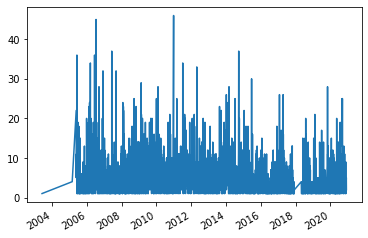

In [362]:
superuser_dates.value_counts().plot()

Looked at their imdb profile - wow, this person seems legit

Edit: same with the person in second place, I'm guessing imdb does their own bot detection which is nice

How many ratings would they have had to do a day?

In [23]:
superuser.groupby("date").count()["rating"].describe()

count    4560.000000
mean        5.294956
std         4.362100
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        46.000000
Name: rating, dtype: float64

In [24]:
superuser.groupby(date).count().mean()

user      5.294956
movie     5.294956
rating    5.294956
date      5.294956
dtype: float64

So in summary, we've got a skewed distribution of users leaving ratings. That's all fine.

What about users who rate a lot of movies on the same day?

In [52]:
user_day_ratings = d.groupby("userdate")["rating"].count()

In [54]:
user_day_ratings.sort_values(ascending=False)

userdate
ur4394928820 July 2019        442
ur7606257331 March 2020       245
ur161610134 March 2008        236
ur6266043118 February 2019    231
ur7606257314 June 2020        230
                             ... 
ur198009226 April 2004          1
ur198009226 April 2016          1
ur198009226 August 2014         1
ur198009226 August 2019         1
ur999998817 October 2008        1
Name: rating, Length: 3726437, dtype: int64

Looked into the first one - they seem to be legit ratings, probably just a dump of this person's opinions

In [56]:
(user_day_ratings > 100).sum()

54

In [58]:
(user_day_ratings > 10).sum()

8574

In [59]:
user_day_ratings.describe()

count    3.726437e+06
mean     1.253160e+00
std      1.358310e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.420000e+02
Name: rating, dtype: float64

What do mean ratings tend to be?

In [66]:
d["rating"] = d["rating"].astype(int)

In [67]:
user_ratings = d.groupby("user")["rating"].mean()

In [69]:
user_ratings.sort_values(ascending=False, inplace=True)

<AxesSubplot:xlabel='user'>

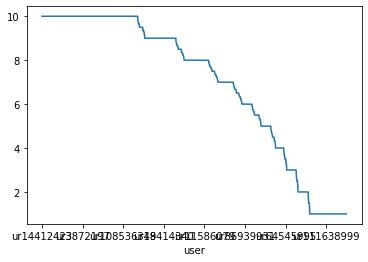

In [71]:
user_ratings.plot()

In [72]:
user_ratings.describe()

count    1.499238e+06
mean     6.961151e+00
std      3.189579e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: rating, dtype: float64

So a quarter of people give an average rating of 10, the median is 8, and a quarter give ratings of 5 or less

That's actually surprising, considering scores on imdb are typically a lot lower than 8 - definitely some selection bias

What's the rating distribution like for people who leave a lot of ratings?

In [364]:
user_ratings[user_review_counts > 10].describe()

user
ur68326527    10.0
ur90801764    10.0
ur52234690    10.0
ur1673306     10.0
ur1653550     10.0
              ... 
ur48973212     1.0
ur47732822     1.0
ur19489421     1.0
ur19925240     1.0
ur22666585     1.0
Name: rating, Length: 43725, dtype: float64

In [365]:
user_ratings[user_review_counts > 10].describe()

count    43725.000000
mean         6.656350
std          1.637083
min          1.000000
25%          5.650000
50%          6.800000
75%          7.800000
max         10.000000
Name: rating, dtype: float64

In [74]:
d["rating"].describe()

count    4.669820e+06
mean     6.758660e+00
std      2.978028e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

So the ratings distribution is kind of similar

How many duplicated movies per user?

In [16]:
duped_user_movie = (d.groupby("user")["movie"].count() - d.groupby("user")["movie"].nunique())

In [145]:
(duped_user_movie > 0).sum()

16216

In [19]:
(duped_user_movie > 1).sum()

2552

In [18]:
16216 / len(duped_user_movie)

0.010816161276595177

So 1% of users leave multiple reviews on the same movie

In [ ]:
duped_user_movie.describe()

seems like it's not too big a deal, no more than 6 reviews for a film

# That's enough of users - let's talk about dates!

In [78]:
d["date"] = d["date"].astype(np.datetime64)

In [79]:
d["date"].describe()

<ipython-input-79-23d96a13a73f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  d["date"].describe()


count                 4669820
unique                   8028
top       2019-05-20 00:00:00
freq                     7291
first     1998-07-27 00:00:00
last      2020-12-03 00:00:00
Name: date, dtype: object

So we have observations spanning from July 1998 to December 3 2020

In [82]:
22*365 # days between December 3 1998 and December 3 2020 roughly

8030

So we have pretty much every day represented

In [369]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

<AxesSubplot:title={'center':'Number of Ratings over Time'}, xlabel='date', ylabel='num_ratings'>

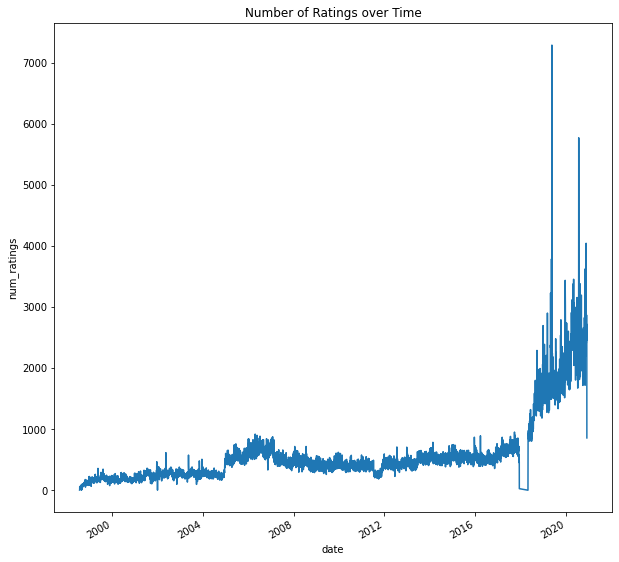

In [372]:
d.groupby("date")["rating"].count().plot(ylabel="num_ratings", title="Number of Ratings over Time")

So we have way more ratings 2018 onwards, and another boost in 2005, and a couple crazy days in 2020

<AxesSubplot:xlabel='date'>

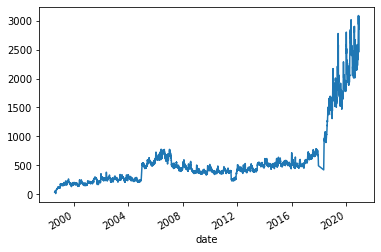

In [86]:
d.groupby("date")["rating"].count().rolling(10).mean().plot()

In [92]:
from datetime import datetime

In [109]:
(d["date"] > datetime(2020,1,1)).sum()

799864

I wonder how the distribution is by year

In [114]:
d["date"][:100].dt.year

0     2005
1     2005
2     2005
3     2005
4     2005
      ... 
95    2005
96    2005
97    2005
98    2005
99    2005
Name: date, Length: 100, dtype: int64

In [115]:
d["year"] = d["date"].dt.year

In [116]:
d["month"] = d["date"].dt.month

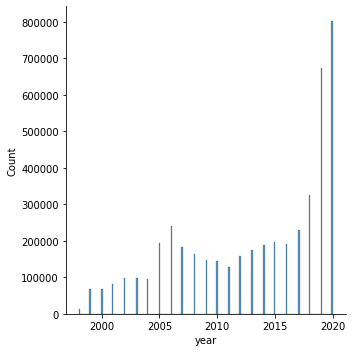

In [130]:
sns.displot(d["year"])

Huge bump in popularity in 2019, 2020 (like 2x previous years)

Also a 2x jump from 2004 to 2005, where popularity was similar for the following decade

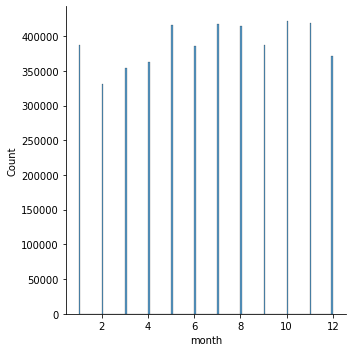

In [127]:
sns.displot(d["month"])

<AxesSubplot:xlabel='year,month'>

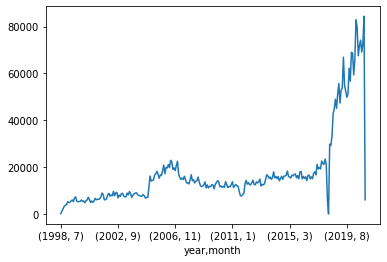

In [133]:
d.groupby(["year", "month"])["rating"].count().plot()

very little seasonality

What's this dip in like 2018?

<AxesSubplot:xlabel='month'>

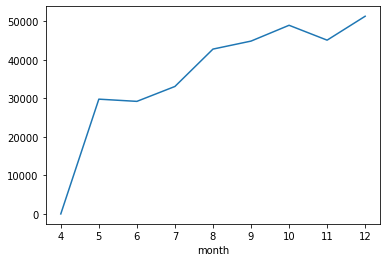

In [137]:
d[d["year"] == 2018].groupby("month")["rating"].count().plot()

So the dip is like first three months of 2018

Couldn't figure out why

What happened in 2005 to get more reviews?

<AxesSubplot:xlabel='date'>

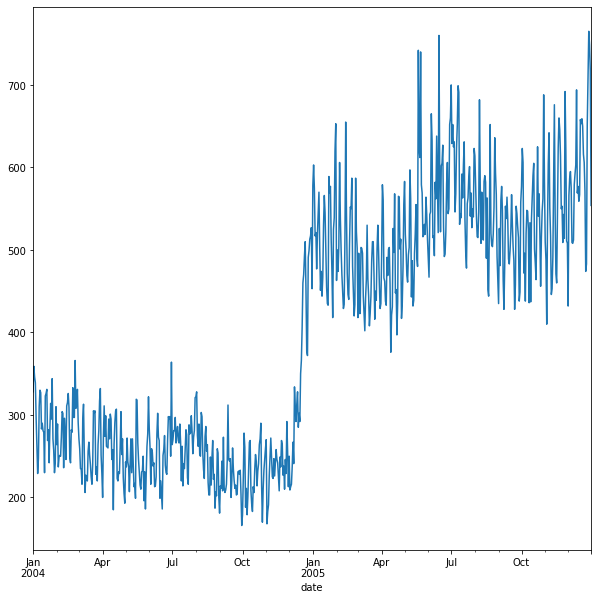

In [386]:
d[(d["year"] == 2005) | (d["year"] == 2004)].groupby("date")["rating"].count().plot()

Not sure, but it seems to have started right in 2005

How many unique films being reviewed over time?

<AxesSubplot:xlabel='date'>

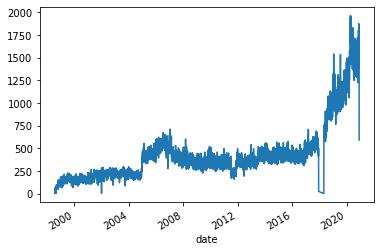

In [139]:
d.groupby("date")["movie"].nunique().plot()

Similar situation to num reviews

What if we look at specific outliers?

In [63]:
d["date"].value_counts()

20 May 2019         7291
25 July 2020        5773
24 July 2020        4542
21 November 2020    4045
13 May 2019         3788
                    ... 
25 August 1998         7
27 August 1998         6
27 July 1998           3
1 January 2002         2
30 April 2018          1
Name: date, Length: 8028, dtype: int64

What's special about 20 May 2019?

In [153]:
d[d["date"] == "20 May 2019"]["movie"].value_counts()

tt6027920    5145
tt0944947     432
tt6146586      63
tt4154796      51
tt6027916      41
             ... 
tt2537176       1
tt1095018       1
tt9700916       1
tt5427194       1
tt0081383       1
Name: movie, Length: 1060, dtype: int64

top title is the last Game of Thrones episode

In [154]:
d[d["date"] == "25 July 2020"]["movie"].value_counts()

tt8110330     3389
tt10230426      69
tt9784456       63
tt8210856       52
tt10003008      26
              ... 
tt5963066        1
tt5695316        1
tt11230868       1
tt8435344        1
tt0898266        1
Name: movie, Length: 1621, dtype: int64

In [155]:
d[d["date"] == "24 July 2020"]["movie"].value_counts()

tt8110330     2468
tt9784456      127
tt11730940      88
tt8210856       51
tt12344410      36
              ... 
tt1266020        1
tt8466562        1
tt5027774        1
tt2283336        1
tt0081873        1
Name: movie, Length: 1408, dtype: int64

A bollywood fault in our stars thing for both

In [156]:
d[d["date"] == "21 November 2020"]["movie"].value_counts()

tt10073984    1226
tt10717930      60
tt13411840      59
tt12987728      50
tt8633478       49
              ... 
tt7263154        1
tt0059087        1
tt11199310       1
tt0713846        1
tt0400761        1
Name: movie, Length: 1769, dtype: int64

Supernatural finale

# That's enough about dates, let's talk about ratings!

In [147]:
import gc
gc.collect()

1922130

How are the ratings distributed overall?

In [148]:
d["rating"] = d["rating"].astype(int)

In [149]:
d["rating"].value_counts()

10    1122764
8      654826
9      565159
7      541806
1      466498
6      390113
5      297814
4      223336
3      211807
2      195697
Name: rating, dtype: int64

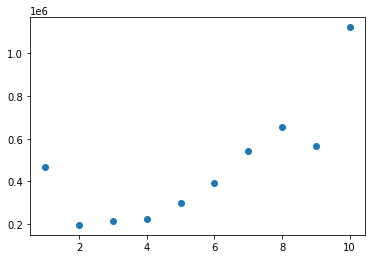

In [150]:
plt.plot(d["rating"].value_counts().index, d["rating"].value_counts().values, 'o')

So we have a lot of people giving out 1s, then 7s, 9s, 8s, and then a heck ton of 10s.

How do we summarize user ratings distributions? We want to cluster users by rating habit similarity, but need to parametrize their distributions in order to do that effectively.

Let's first look at the rating distribution for a few random users

In [77]:
d.iloc[int(np.random.random() * len(d))]

user                ur2526636
movie               tt0069732
rating                     10
date      2009-07-10 00:00:00
Name: 953085, dtype: object

In [132]:
username = d['user'][int(np.random.random() * len(d))]

In [133]:
d[d['user'] == username]["rating"].value_counts()

6    4
1    3
7    2
5    1
8    1
9    1
Name: rating, dtype: int64

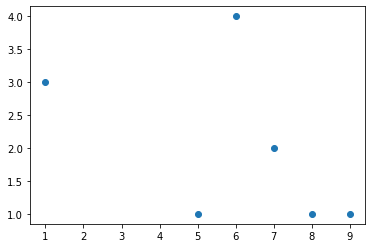

In [134]:
plt.plot(d[d['user'] == username]["rating"].value_counts().index, d[d['user'] == username]["rating"].value_counts().values, 'o')

So it seems like people are pretty random, though I think that if they rate fewer movies, they're more likely to have more 10s.

In [170]:
d.groupby("movie")["rating"].mean().describe()

count    351109.000000
mean          6.968787
std           2.174290
min           1.000000
25%           5.800000
50%           7.000000
75%           8.552941
max          10.000000
Name: rating, dtype: float64

# Titles

In [161]:
d["movie"].describe()

count       4669820
unique       351109
top       tt7286456
freq          10534
Name: movie, dtype: object

We've got 351K movies

What's the titles distribution?

<AxesSubplot:>

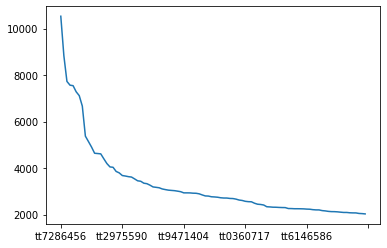

In [144]:
d["movie"].value_counts()[:100].plot()

<AxesSubplot:>

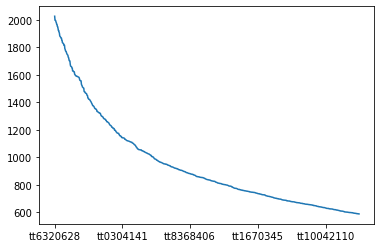

In [145]:
d["movie"].value_counts()[100:1000].plot()

<AxesSubplot:>

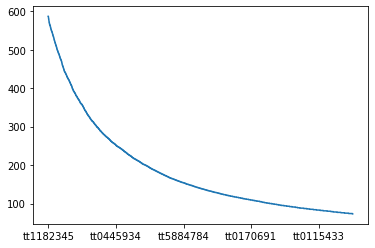

In [146]:
d["movie"].value_counts()[1000:10000].plot()

So it's pretty exponentially distributed

In [157]:
num_movie_ratings = d["movie"].value_counts()

In [158]:
num_movie_ratings

tt7286456    10534
tt4154796     8835
tt8110330     7729
tt0111161     7568
tt2527338     7547
             ...  
tt0291313        1
tt1383938        1
tt0000352        1
tt5770478        1
tt0193731        1
Name: movie, Length: 351109, dtype: int64

Fun fact, the top movie is Joker, then Endgame, then Indian fault in stars

In [159]:
num_movie_ratings.describe()

count    351109.000000
mean         13.300200
std          86.899503
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max       10534.000000
Name: movie, dtype: float64

So three quarters have less than 5 reviews, the most has 10k reviews

In [160]:
(num_movie_ratings > 100).sum()

7534

In [373]:
(num_movie_ratings > 10).sum()

52701

Only 7k with over 100 reviews, out of 351k (still a decent sized dataset)

In [162]:
unique_users = d.groupby("movie")["user"].nunique()

In [164]:
unique_users.sort_values(ascending=False)

movie
tt7286456    10407
tt4154796     8695
tt8110330     7667
tt0111161     7499
tt2527338     7428
             ...  
tt1697098        1
tt1697100        1
tt1697118        1
tt0623181        1
tt0808500        1
Name: user, Length: 351109, dtype: int64

Nothing too surprising - we already knew that most users didn't rate multiple movies

Are there some movies that got more duplicate reviews?

In [166]:
duped_ratings = d[d[["user","movie","rating"]].duplicated()]

In [168]:
duped_ratings["movie"].value_counts()

tt10350626    379
tt7743400     273
tt6027920     185
tt4154796     140
tt7784604     136
             ... 
tt0089111       1
tt0067588       1
tt0108783       1
tt10199586      1
tt2332831       1
Name: movie, Length: 9075, dtype: int64

Nothing otherworldly here

When do these movies get their first review?

In [176]:
movie_first_reviews = d.groupby("movie")["date"].first().sort_values(ascending=False)

In [178]:
movie_first_reviews.describe()

<ipython-input-178-cb7ae59360ab>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movie_first_reviews.describe()


count                  351109
unique                   7996
top       2005-01-16 00:00:00
freq                      395
first     1998-07-29 00:00:00
last      2020-12-03 00:00:00
Name: date, dtype: object

<AxesSubplot:xlabel='movie'>

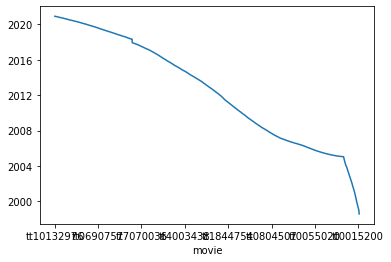

In [175]:
d.groupby("movie")["date"].first().sort_values(ascending=False).plot()

<AxesSubplot:xlabel='date'>

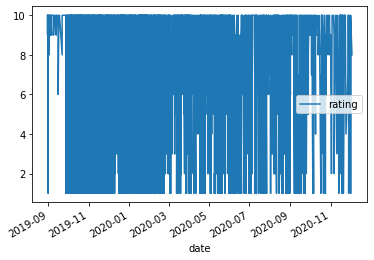

In [149]:
d[d["movie"] == "tt7286456"].plot(x="date", y="rating")

In [150]:
joker = d[d["movie"] == "tt7286456"]

In [ ]:
joker["cumavg"] = joker["rating"].()

Note that these aren't necessarily by time

<AxesSubplot:>

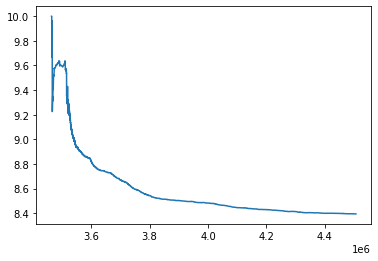

In [154]:
joker["rating"].expanding().mean().plot()

In [151]:
joker["rating"].mean()

8.394816783747864

What about a rolling average? Would be less misleading

<AxesSubplot:>

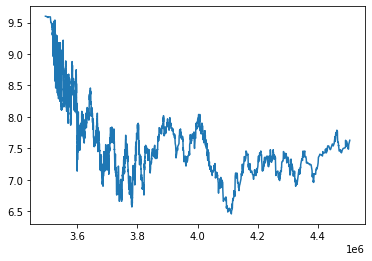

In [164]:
joker["rating"].rolling(100).mean().plot()

However, this doesn't actually capture rolling average over time... just over number of ratings

What I really want is an average over a few days, or even a daily average would be alright

That said, looking at number of ratings isn't so bad - a decent first test of decreasing ratings over time

In [245]:
d["movie"].sample().values[0]

'tt0257044'

<AxesSubplot:>

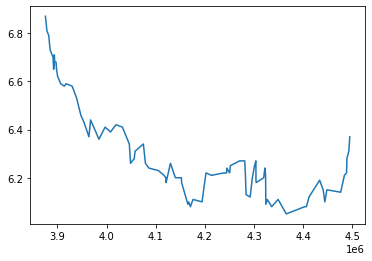

In [269]:
curmovie = d["movie"].sample().values[0]
d[d["movie"] == curmovie]["rating"].rolling(100).mean().plot()

In [270]:
curmovie

'tt5827916'

In [135]:
# estimate the slope of time for each movie - fixed effects!

# Bringing in Info on Different Titles for Each Movie (Not Helpful)

This has all of the different titles for each titleId, along with regions and language and whether it's a tv show or whatever. Drawback is that it's 30 million rows. Probably not useful? Except perhaps in determining language.

In [180]:
#titles = pd.read_csv("title.akas.tsv", sep="\t")

/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [181]:
#titles

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
29824980,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
29824981,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
29824982,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
29824983,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [182]:
#titles.describe()

,ordering
count,2.982498e+07
mean,4.004033e+00
std,3.438260e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.740000e+02


Sheesh, 29M rows... let's get rid of the ones we don't need

In [187]:
#reduced_titles = titles[titles["titleId"].isin(d["movie"])]

In [188]:
#reduced_titles

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
29824701,tt9916720,5,The Nun 2,\N,\N,original,\N,1
29824702,tt9916720,6,La suora 2,IT,\N,imdbDisplay,\N,0
29824703,tt9916720,7,Rahibe 2,TR,tr,imdbDisplay,\N,0
29824704,tt9916720,8,The Nun 2,DE,\N,imdbDisplay,\N,0


Got it down to 2 million rows!

In [189]:
#titles = reduced_titles

In [190]:
#titles["region"].value_counts()

\N    263721
US    260581
GB    121821
FR     77552
CA     77164
       ...  
ER         1
MR         1
SZ         1
LR         1
BW         1
Name: region, Length: 210, dtype: int64

In [191]:
#titles["language"].value_counts()

\N     1628824
en      137908
ja       50568
fr       42445
tr       21965
        ...   
my           1
ne           1
fro          1
rn           1
ku           1
Name: language, Length: 98, dtype: int64

In [192]:
#titles["types"].value_counts()

imdbDisplay             1190149
\N                       452198
original                 240209
alternative               35334
working                   25779
dvd                       18334
video                     17180
tv                        14222
festival                   8363
dvdimdbDisplay             238
imdbDisplaytv               68
festivalimdbDisplay         48
imdbDisplayvideo            22
imdbDisplayworking          10
alternativetv                9
tvvideo                      7
alternativedvd               6
videoworking                 5
tvworking                    4
alternativeworking           4
dvdvideo                     2
alternativefestival          2
alternativevideo             2
festivalworking              1
Name: types, dtype: int64

In [195]:
#titles.dtypes

titleId            object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtype: object

In [196]:
#titles["isOriginalTitle"].value_counts()

0    1294845
0     467142
1     186450
1      53759
Name: isOriginalTitle, dtype: int64

In [197]:
#titles["isOriginalTitle"].astype(int).value_counts()

0    1761987
1     240209
Name: isOriginalTitle, dtype: int64

In [198]:
#titles["isOriginalTitle"] = titles["isOriginalTitle"].astype(int)

<ipython-input-198-100b572a2482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles["isOriginalTitle"] = titles["isOriginalTitle"].astype(int)


In [199]:
#titles["isOriginalTitle"].isna().sum()

0

In [202]:
#(titles.groupby("titleId")["isOriginalTitle"].sum().sort_values() != 1).sum()

73126

A decent portion of our 350k titles don't have a single original title

# Bringing in Title, Format, Genre, Year, Runtime

In [374]:
gc.collect()

31168

This has the title identifier, the media format (film vs tv show), the title, the original title, the year of origin, the length, whether it's adult, and the genres

One of the first uses here is going to be in determining which entries are movies.

In [205]:
basics = pd.read_csv("title.basics.tsv", sep="\t")

/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [207]:
basics["tconst"].duplicated().sum()

0

Getting it down to just the titles we have in our ratings dataset

In [208]:
test = basics[basics["tconst"].isin(d["movie"])]

In [209]:
test

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...
8468302,tt9916204,tvEpisode,Better Angels,Better Angels,0,2019,\N,42,"Drama,Thriller"
8468335,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller
8468380,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History"
8468412,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War"


In [210]:
basics = test

In [212]:
basics["titleType"].value_counts()

movie           139631
tvEpisode       100281
short            35937
tvSeries         27340
tvMovie          19333
video            15085
tvMiniSeries      4767
videoGame         4099
tvSpecial         3071
tvShort            715
Name: titleType, dtype: int64

In [225]:
basics["titleType"].isna().sum()

0

In [213]:
basics["isAdult"].value_counts()

0    345886
1      3871
0       497
1         5
Name: isAdult, dtype: int64

In [214]:
basics.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [215]:
basics["isAdult"] = basics["isAdult"].astype(int)

<ipython-input-215-3dfbce6bfe8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics["isAdult"] = basics["isAdult"].astype(int)


In [216]:
basics["startYear"].value_counts()

2019    16149
2018    14831
2017    14072
2016    11603
2015    11274
        ...  
1989        1
1983        1
1981        1
1980        1
1883        1
Name: startYear, Length: 237, dtype: int64

In [218]:
basics["startYear"].value_counts()[:10]

2019    16149
2018    14831
2017    14072
2016    11603
2015    11274
2020    11017
2014    10773
2013    10189
2012     9761
2011     9420
Name: startYear, dtype: int64

In [226]:
basics[basics["titleType"] == "movie"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
1246,tt0001258,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama
1273,tt0001285,movie,The Life of Moses,The Life of Moses,0,1909,\N,50,"Biography,Drama,Family"
1578,tt0001592,movie,In the Prime of Life,Ekspeditricen,0,1911,\N,52,Drama
1872,tt0001892,movie,Den sorte drøm,Den sorte drøm,0,1911,\N,53,Drama
...,...,...,...,...,...,...,...,...,...
8467596,tt9914644,movie,9/11: Escape from the Towers,9/11: Escape from the Towers,0,2018,\N,120,Documentary
8468296,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller"
8468335,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller
8468380,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History"


Check that there's no dupes

In [233]:
basics["tconst"].value_counts()

tt0638252    1
tt0170691    1
tt0177443    1
tt2633894    1
tt0127523    1
            ..
tt0946364    1
tt2141875    1
tt0205152    1
tt0522865    1
tt1422477    1
Name: tconst, Length: 350259, dtype: int64

We're good.

In [227]:
# what are the movies?
sample = pd.merge(left=d,right=basics[basics["titleType"] == "movie"], left_on="movie", right_on="tconst")

In [271]:
d

,user,movie,rating,date,userdate,year,month
0,ur4592644,tt0120884,10,2005-01-16,ur459264416 January 2005,2005,1
1,ur3174947,tt0118688,3,2005-01-16,ur317494716 January 2005,2005,1
2,ur3780035,tt0387887,8,2005-01-16,ur378003516 January 2005,2005,1
3,ur4592628,tt0346491,1,2005-01-16,ur459262816 January 2005,2005,1
4,ur3174947,tt0094721,8,2005-01-16,ur317494716 January 2005,2005,1
...,...,...,...,...,...,...,...
4669815,ur0581842,tt0107977,6,2005-01-16,ur058184216 January 2005,2005,1
4669816,ur3174947,tt0103776,8,2005-01-16,ur317494716 January 2005,2005,1
4669817,ur4592639,tt0107423,9,2005-01-16,ur459263916 January 2005,2005,1
4669818,ur4581944,tt0102614,8,2005-01-16,ur458194416 January 2005,2005,1


In [228]:
sample

,user,movie,rating,date,userdate,year,month,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,ur4592644,tt0120884,10,2005-01-16,ur459264416 January 2005,2005,1,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
1,ur9036543,tt0120884,8,2006-01-24,ur903654324 January 2006,2006,1,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
2,ur11167152,tt0120884,8,2011-06-14,ur1116715214 June 2011,2011,6,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
3,ur0055545,tt0120884,8,1999-05-16,ur005554516 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
4,ur0338514,tt0120884,8,1999-05-22,ur033851422 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444436,ur3574726,tt0070507,8,2005-01-12,ur357472612 January 2005,2005,1,tt0070507,movie,Panorama Blue,Panorama Blue,0,1974,\N,82,Comedy
3444437,ur3513503,tt0432965,6,2005-01-12,ur351350312 January 2005,2005,1,tt0432965,movie,Mr. Patterns,Mr. Patterns,0,2004,\N,54,Documentary
3444438,ur1219578,tt0287448,3,2005-01-12,ur121957812 January 2005,2005,1,tt0287448,movie,The Warrior's Brother,Le frère du guerrier,0,2002,\N,115,"Drama,History"
3444439,ur4573074,tt0091926,10,2005-01-13,ur457307413 January 2005,2005,1,tt0091926,movie,The 17th Bride,Ha-Kala,0,1985,\N,95,Drama


We've actually lost a decent portion of our ratings dataset by doing that... I guess there are movies with ratings but no entry in basics? Or there are other formats besides movies in our ratings dataset

Question: was everything in d also in the basic info dataset? We already cut basics down to everything in d - is there anything in d that's not in ratings?

In [274]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...
8468302,tt9916204,tvEpisode,Better Angels,Better Angels,0,2019,\N,42,"Drama,Thriller"
8468335,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller
8468380,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History"
8468412,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War"


I would expect this to be 0 if the basics dataset was complete.

In [276]:
len(set(d["movie"]) - set(basics["tconst"]))

850

Interesting... what are these movies that aren't in the basics dataset?

In [278]:
missing_tconsts = set(d["movie"]) - set(basics["tconst"])

In [281]:
missing_movies = d[d["movie"].isin(missing_tconsts)]

In [282]:
missing_movies

,user,movie,rating,date,userdate,year,month
17627,ur0137908,tt0088263,8,2005-02-19,ur013790819 February 2005,2005,2
42233,ur5127048,tt0232677,10,2005-04-11,ur512704811 April 2005,2005,4
54980,ur0999795,tt0114038,10,2005-05-08,ur09997958 May 2005,2005,5
70698,ur2600145,tt0114038,8,2005-06-06,ur26001456 June 2005,2005,6
75343,ur4518596,tt0088263,10,2005-06-14,ur451859614 June 2005,2005,6
...,...,...,...,...,...,...,...
4623969,ur3372498,tt0353789,7,2004-08-28,ur337249828 August 2004,2004,8
4624534,ur1938756,tt0357084,10,2003-07-17,ur193875617 July 2003,2003,7
4624535,ur2623599,tt0357084,9,2003-08-12,ur262359912 August 2003,2003,8
4640918,ur1293485,tt0124288,8,2004-10-20,ur129348520 October 2004,2004,10


This is only 3.5k reviews... small beans

In [283]:
sample

,user,movie,rating,date,userdate,year,month,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,ur4592644,tt0120884,10,2005-01-16,ur459264416 January 2005,2005,1,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
1,ur9036543,tt0120884,8,2006-01-24,ur903654324 January 2006,2006,1,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
2,ur11167152,tt0120884,8,2011-06-14,ur1116715214 June 2011,2011,6,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
3,ur0055545,tt0120884,8,1999-05-16,ur005554516 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
4,ur0338514,tt0120884,8,1999-05-22,ur033851422 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444436,ur3574726,tt0070507,8,2005-01-12,ur357472612 January 2005,2005,1,tt0070507,movie,Panorama Blue,Panorama Blue,0,1974,\N,82,Comedy
3444437,ur3513503,tt0432965,6,2005-01-12,ur351350312 January 2005,2005,1,tt0432965,movie,Mr. Patterns,Mr. Patterns,0,2004,\N,54,Documentary
3444438,ur1219578,tt0287448,3,2005-01-12,ur121957812 January 2005,2005,1,tt0287448,movie,The Warrior's Brother,Le frère du guerrier,0,2002,\N,115,"Drama,History"
3444439,ur4573074,tt0091926,10,2005-01-13,ur457307413 January 2005,2005,1,tt0091926,movie,The 17th Bride,Ha-Kala,0,1985,\N,95,Drama


In [284]:
d.shape

(4669820, 7)

In [285]:
basics.shape

(350259, 9)

# Bringing in Data on Ratings and Votes

In [219]:
ratings = pd.read_csv("title.ratings.tsv", sep="\t")

In [221]:
ratings = ratings[ratings["tconst"].isin(d["movie"])]

Note that these ratings are not necessarily what's displayed on IMDb I don't think, since they probably have some filtering to make their rating

In [290]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1839
2,tt0000003,6.5,1599
4,tt0000005,6.2,2416
6,tt0000007,5.4,755
7,tt0000008,5.5,1983
...,...,...,...
1197172,tt9916204,8.2,219
1197175,tt9916270,5.8,1218
1197178,tt9916362,6.4,4085
1197181,tt9916428,3.8,14


In [292]:
ratings.sort_values("numVotes", ascending=False)

,tconst,averageRating,numVotes
82256,tt0111161,9.3,2490611
249118,tt0468569,9.0,2442962
618030,tt1375666,8.8,2192148
98713,tt0137523,8.8,1961154
82040,tt0110912,8.9,1925000
...,...,...,...
310519,tt0606168,6.4,5
310516,tt0606165,7.6,5
310514,tt0606163,6.4,5
62029,tt0087255,6.8,5


Question: How representative of the overall ratings are our review ratings?

Approach:
* Create a table with averageRating, numVotes, averageReviewRating, numReviews, Title

In [296]:
review_ratings = sample.groupby("tconst").agg({"rating": 'mean', "primaryTitle": 'max', "startYear": "max", "genres": "max", "runtimeMinutes": "max", "user": "count"})

In [297]:
review_ratings.rename(columns={"user": "numReviews"}, inplace=True)

In [299]:
review_ratings.rename(columns={"rating": "averageReview"}, inplace=True)

In [300]:
review_ratings

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews
tconst,,,,,,
tt0000574,8.666667,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",70,6
tt0001258,7.000000,The White Slave Trade,1910,Drama,45,1
tt0001285,6.000000,The Life of Moses,1909,"Biography,Drama,Family",50,1
tt0001592,4.000000,In the Prime of Life,1911,Drama,52,1
tt0001892,5.000000,Den sorte drøm,1911,Drama,53,4
...,...,...,...,...,...,...
tt9914644,5.500000,9/11: Escape from the Towers,2018,Documentary,120,2
tt9916190,8.129032,Safeguard,2020,"Action,Adventure,Thriller",90,62
tt9916270,4.000000,Il talento del calabrone,2020,Thriller,84,4


Note that there's a few movies that aren't in the ratings dataset but are in our sample dataset... not too important

In [302]:
movie_info = review_ratings.merge(ratings, left_index=True, right_on="tconst")

In [303]:
movie_info

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes
374,8.666667,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",70,6,tt0000574,6.1,737
768,7.000000,The White Slave Trade,1910,Drama,45,1,tt0001258,5.8,136
777,6.000000,The Life of Moses,1909,"Biography,Drama,Family",50,1,tt0001285,5.4,56
870,4.000000,In the Prime of Life,1911,Drama,52,1,tt0001592,5.5,14
944,5.000000,Den sorte drøm,1911,Drama,53,4,tt0001892,5.9,218
...,...,...,...,...,...,...,...,...,...
1197110,5.500000,9/11: Escape from the Towers,2018,Documentary,120,2,tt9914644,8.2,93
1197169,8.129032,Safeguard,2020,"Action,Adventure,Thriller",90,62,tt9916190,3.6,226
1197175,4.000000,Il talento del calabrone,2020,Thriller,84,4,tt9916270,5.8,1218
1197178,10.000000,Coven,2020,"Drama,History",92,1,tt9916362,6.4,4085


In [304]:
movie_info.describe()

,averageReview,numReviews,averageRating,numVotes
count,136285.000000,136285.000000,136285.000000,1.362850e+05
mean,6.612226,25.246197,6.073422,6.692772e+03
std,2.055125,126.639243,1.266476,4.637875e+04
min,1.000000,1.000000,1.000000,5.000000e+00
25%,5.416667,1.000000,5.300000,6.900000e+01
50%,6.876106,4.000000,6.200000,2.370000e+02
75%,8.000000,12.000000,6.900000,1.032000e+03
max,10.000000,10534.000000,10.000000,2.490611e+06


In [305]:
movie_info["diffRating"] = movie_info["averageRating"] - movie_info["averageReview"]

In [375]:
movie_info["diffRating"].describe()

count    136285.000000
mean         -0.538805
std           1.655554
min          -8.900000
25%          -1.500000
50%          -0.550000
75%           0.300000
max           8.000000
Name: diffRating, dtype: float64

<AxesSubplot:title={'center':'Average Rating - Average Review for movies'}, ylabel='Frequency'>

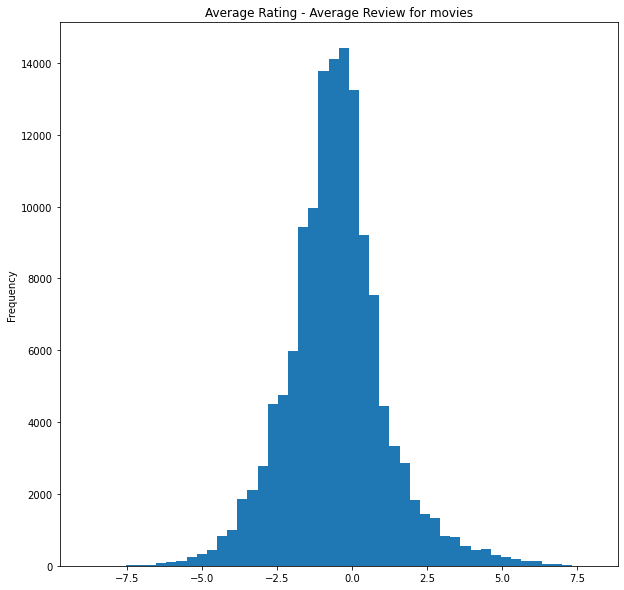

In [379]:
movie_info["diffRating"].plot(kind="hist", bins=50, xlabel="Difference in Rating", title="Average Rating - Average Review for movies")

<AxesSubplot:>

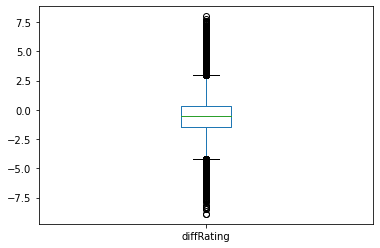

In [318]:
movie_info["diffRating"].plot(kind="box")

<AxesSubplot:>

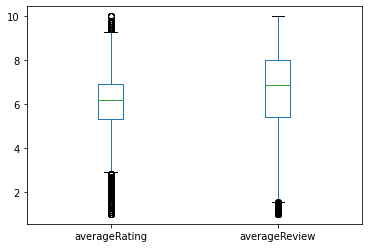

In [319]:
movie_info[["averageRating", "averageReview"]].plot(kind="box")

<AxesSubplot:>

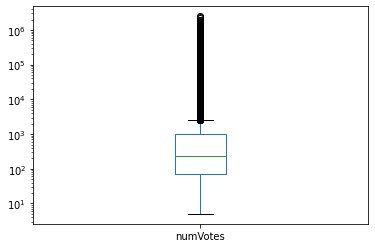

In [327]:
movie_info[["numVotes"]].plot(kind="box", logy=True)

<AxesSubplot:ylabel='Frequency'>

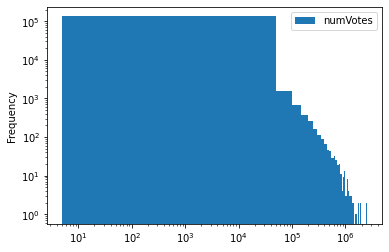

In [340]:
movie_info[["numVotes"]].plot(kind="hist", logy=True, logx=True, bins=50)

<AxesSubplot:ylabel='Frequency'>

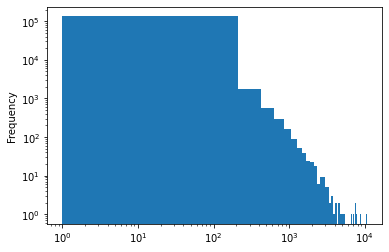

In [338]:
movie_info["numReviews"].plot(kind="hist", logy=True, logx=True, bins=50)

In [333]:
movie_info["ratioVotes"] = movie_info["numVotes"] / movie_info["numReviews"]

<AxesSubplot:>

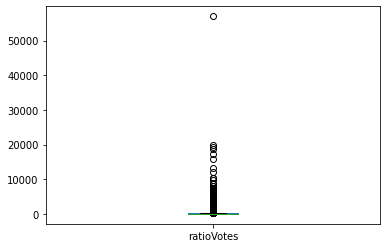

In [341]:
movie_info["ratioVotes"].plot(kind="box")

In [376]:
movie_info["ratioVotes"].describe()

count    136285.000000
mean        131.467015
std         307.361108
min           0.894737
25%          28.500000
50%          61.631579
75%         143.500000
max       56995.600000
Name: ratioVotes, dtype: float64

That gives votes / reviews - I guess it's not all that helpful

In [294]:
sample.isna().sum()

user              0
movie             0
rating            0
date              0
userdate          0
year              0
month             0
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

I'm saving this movie dataframe, and I'm saving the sample dataframe

In [344]:
sample.to_csv("211210cleaned_movie_ratings.csv")

In [345]:
movie_info.to_csv("211210movie_info.csv")

# Assumptions about the data

We have four columns: user, title, rating, and date

Each observation is a user leaving a comment on a title on a specific date

I'm implicitly assuming that each title is a movie - definitely worth testing - false

I have either all of the reviews for each movie, or at least a representative sample of the reviews for each movie